# Steps for a basic problem in NN 

In [203]:
import tensorflow as tf

print(tf.__version__)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

2.15.0


In [204]:
# obtain the data 

dataset_path = tf.keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")


In [205]:
dataset_path

'/home/mstorresh/.keras/datasets/auto-mpg.data'

In [206]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',   'Acceleration', 'Model Year', 'Origin'] 


raw_dataset = pd.read_csv(dataset_path, names= column_names,
                          na_values="?", comment='\t',
                          sep=" ", skipinitialspace=True)

data_set = raw_dataset.copy()

In [207]:
data_set.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [208]:
data_set.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [209]:
# erase the rows that have an empty value in one of the columns

data_set = data_set.dropna()

In [210]:
data_set.isna().sum()


MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [211]:
origin = data_set.pop('Origin')
data_set['USA'] = (origin == 1)*1.0
data_set['Europe'] = (origin == 2)*1.0
data_set['Japan'] = (origin == 3)* 1.0
origin.tail()

393    1
394    2
395    1
396    1
397    1
Name: Origin, dtype: int64

In [212]:
data_set.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [213]:
data_set['MPG']

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: MPG, Length: 392, dtype: float64

In [214]:
# split the dataset for test and training 

train_dataset = data_set.sample(frac=0.8, random_state=0)
test_dataset = data_set.drop(train_dataset.index)

In [215]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [216]:
# just to check the mean and std for the data 
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [217]:
#there are some values that are big, so the best thing to do is to normalize the data

def norma(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norma(train_dataset)
normed_test_data = norma(test_dataset)


In [218]:
# just to check the mean and std for the data 

normed_train_stats = normed_train_data.describe()
normed_train_stats = normed_train_stats.transpose()
normed_train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,1.725442e-16,1.0,-1.457657,-0.869348,-0.869348,1.483887,1.483887
Displacement,314.0,8.344351e-17,1.0,-1.220325,-0.860894,-0.424785,0.675074,2.489002
Horsepower,314.0,-1.131437e-17,1.0,-1.545283,-0.751241,-0.272190,0.607162,3.153347
Weight,314.0,-8.485781e-17,1.0,-1.589352,-0.869478,-0.198782,0.732017,2.547401
Acceleration,314.0,-5.148041e-16,1.0,-2.710152,-0.630725,-0.021237,0.588250,3.313017
Model Year,314.0,9.461646e-16,1.0,-1.604642,-0.788458,0.027726,0.843910,1.660094
USA,314.0,7.071484e-17,1.0,-1.286751,-1.286751,0.774676,0.774676,0.774676
Europe,314.0,5.657187e-17,1.0,-0.465148,-0.465148,-0.465148,-0.465148,2.143005
Japan,314.0,-1.980016e-17,1.0,-0.495225,-0.495225,-0.495225,-0.495225,2.012852


In [219]:
train_dataset.keys()

Index(['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration',
       'Model Year', 'USA', 'Europe', 'Japan'],
      dtype='object')

In [1]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

def nn_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]))
    model.add(Dropout(0.1))
    model.add(Dense(100, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(30, activation='relu'))
    model.add(Dense(1))
    
    return model 

model = nn_model()
model.summary()

2025-01-09 13:21:19.785162: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-09 13:21:19.785437: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-09 13:21:19.819242: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-09 13:21:19.917875: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-09 13:21:21.394002: W tensorflow/compiler/tf2

NameError: name 'train_dataset' is not defined

In [221]:
# optimizer = tf.keras.optimizers.Adam(lr=0.001)
optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(optimizer=optimizer,
              loss='mse',
              metrics=['mae', 'mse'])

decay_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3*0.99**x)

history = model.fit(normed_train_data, train_labels, epochs=1000, #callbacks=[decay_lr],
                    validation_split=0.2, verbose=0)

#validation_split is to save some data for the validation of the model 


In [222]:
# model evaluation

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch 
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.253040,1.102167,2.253040,7.340474,2.106001,7.340474,995
996,2.630851,1.169054,2.630851,7.542712,2.155331,7.542712,996
997,2.404621,1.096992,2.404621,7.822781,2.157598,7.822781,997
998,1.729276,0.960906,1.729276,7.266804,1.991229,7.266804,998
999,2.610709,1.107049,2.610709,7.995054,2.184270,7.995054,999


In [223]:
def plot_history(history):     
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],'r--',
           label='Training Error')
  plt.plot(hist['epoch'], hist['val_mse'],'b',
           label = 'Validation Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

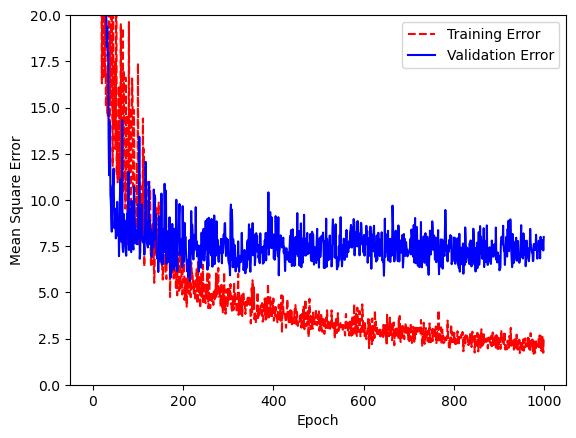

In [224]:
plot_history(history)


In [225]:
# to evaluate
loss, mse, mae = model.evaluate(normed_test_data, test_labels)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))
print("Testing set Mean Sqr Error: {:5.2f} MPG".format(mse))

3/3 [==============================] - 0s 4ms/step - loss: 12.4575 - mae: 2.5214 - mse: 12.4575
Testing set Mean Abs Error: 12.46 MPG
Testing set Mean Sqr Error:  2.52 MPG


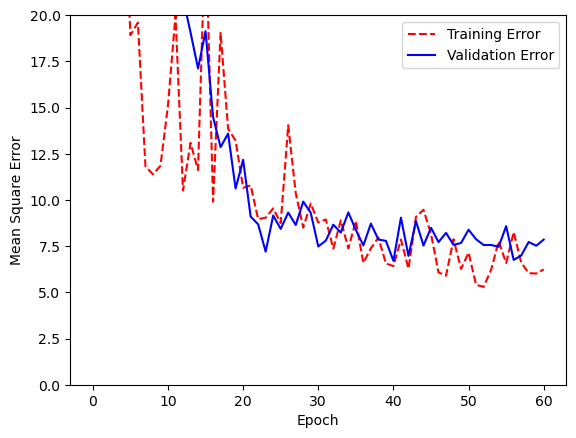

In [232]:
# adding the earlystop to avoid overfitting 
model = nn_model()
optimizer = tf.keras.optimizers.Adam(lr=0.001)
# optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(optimizer=optimizer,
              loss='mse',
              metrics=['mae', 'mse'])

decay_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-2*0.99**x)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(normed_train_data, train_labels, epochs=2000, callbacks=[early_stop, decay_lr],
                    validation_split=0.2, verbose=0)

plot_history(history)

In [233]:
loss, mse, mae = model.evaluate(normed_test_data, test_labels)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))
print("Testing set Mean Sqr Error: {:5.2f} MPG".format(mse))

3/3 [==============================] - 0s 5ms/step - loss: 5.4500 - mae: 1.8939 - mse: 5.4500
Testing set Mean Abs Error:  5.45 MPG
Testing set Mean Sqr Error:  1.89 MPG


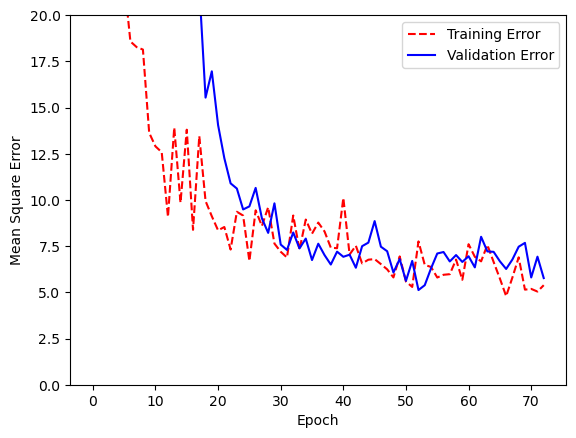

In [228]:
# mae
model = nn_model()
optimizer = tf.keras.optimizers.Adam(lr=0.01)
# optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(optimizer=optimizer,
              loss='mse',
              metrics=['mae', 'mse'])

decay_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-2*0.99**x)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(normed_train_data, train_labels, epochs=1000, callbacks=[early_stop, decay_lr],
                    validation_split=0.2, verbose=0)

plot_history(history)


In [229]:
loss, mse, mae = model.evaluate(normed_test_data, test_labels)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))
print("Testing set Mean Sqr Error: {:5.2f} MPG".format(mse))

3/3 [==============================] - 0s 4ms/step - loss: 4.9964 - mae: 1.8176 - mse: 4.9964
Testing set Mean Abs Error:  5.00 MPG
Testing set Mean Sqr Error:  1.82 MPG
